# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [57]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import math
import pprint

# Import API key
from api_keys import weather_api_key, weather_api_key_ben

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
output_data_file

'output_data/cities.csv'

## Generate Cities List

In [4]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#query link
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Build partial query URL
query_url = f"{url}appid={weather_api_key_ben}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=d0f2c118a59e375cab26298053503fbe&units=imperial&q=


In [6]:
#Loop over cities
#f string to structure
#use mod for record
# Data Frame for later

city_api_df = pd.DataFrame(columns=["City","Latitude", "Longitude", "Temperature (F)", "Humidity (%)", "Cloudiness (%)", "Wind Speed (mph)"])
print(f"Beginning Data Retrieval\n" \
"-----------------------------")
counter = 0
records = 50
for city in cities:
    current_record = (counter % records) + 1
    current_set = math.ceil((counter + 1) / records)
    try:
        response = requests.get(query_url + str(city)).json()
        if response["cod"] == 200:
            print(f"Processing Record {current_record} of Set {current_set} | {city}")
            city_api_df = city_api_df.append({
                "City": response["name"],
                "Latitude": response["coord"]["lat"],
                "Longitude": response["coord"]["lon"],
                "Temperature (F)": response["main"]["temp"],
                "Humidity (%)": response["main"]["humidity"],
                "Cloudiness (%)": response["clouds"]["all"],
                "Wind Speed (mph)": response["wind"]["speed"]
            }, ignore_index=True)
        else:
            raise ValueError()
    except ValueError:
        print(f"Error processing {city}.")
    counter += 1

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Error processing taolanaro.
Processing Record 3 of Set 1 | port lincoln
Processing Record 4 of Set 1 | upernavik
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | jimo
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | victoria
Processing Record 11 of Set 1 | thompson
Processing Record 12 of Set 1 | tuktoyaktuk
Processing Record 13 of Set 1 | buchanan
Processing Record 14 of Set 1 | gigmoto
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | naze
Processing Record 18 of Set 1 | richards bay
Processing Record 19 of Set 1 | saskylakh
Processing Record 20 of Set 1 | tilichiki
Processing Record 21 of Set 1 | longyearbyen
Processing Record 22 of Set 1 | albany
Error processing macaboboni.
Processing Record 24 of Set 1 | 

Processing Record 5 of Set 5 | jinchang
Processing Record 6 of Set 5 | ouargaye
Processing Record 7 of Set 5 | erzin
Processing Record 8 of Set 5 | lebu
Processing Record 9 of Set 5 | merrill
Processing Record 10 of Set 5 | nicoya
Processing Record 11 of Set 5 | tura
Processing Record 12 of Set 5 | angatuba
Processing Record 13 of Set 5 | dingle
Processing Record 14 of Set 5 | mercedes
Processing Record 15 of Set 5 | cabedelo
Processing Record 16 of Set 5 | leningradskiy
Processing Record 17 of Set 5 | ixtapa
Processing Record 18 of Set 5 | carbondale
Processing Record 19 of Set 5 | abatskoye
Processing Record 20 of Set 5 | fortuna
Processing Record 21 of Set 5 | ust-nera
Processing Record 22 of Set 5 | salta
Processing Record 23 of Set 5 | ahuimanu
Processing Record 24 of Set 5 | rudnogorsk
Processing Record 25 of Set 5 | scarborough
Error processing khonuu.
Processing Record 27 of Set 5 | sitka
Processing Record 28 of Set 5 | tocache
Processing Record 29 of Set 5 | phan thiet
Process

Processing Record 12 of Set 9 | kojori
Processing Record 13 of Set 9 | qaanaaq
Processing Record 14 of Set 9 | mamakan
Processing Record 15 of Set 9 | avera
Processing Record 16 of Set 9 | rawson
Processing Record 17 of Set 9 | gulbarga
Processing Record 18 of Set 9 | petropavlovsk-kamchatskiy
Processing Record 19 of Set 9 | ngunguru
Processing Record 20 of Set 9 | wonthaggi
Processing Record 21 of Set 9 | lenger
Processing Record 22 of Set 9 | charyshskoye
Processing Record 23 of Set 9 | broken hill
Processing Record 24 of Set 9 | narsaq
Processing Record 25 of Set 9 | te anau
Processing Record 26 of Set 9 | san jose iturbide
Processing Record 27 of Set 9 | sukhumi
Processing Record 28 of Set 9 | akdepe
Processing Record 29 of Set 9 | acarau
Processing Record 30 of Set 9 | vega de alatorre
Processing Record 31 of Set 9 | kikwit
Processing Record 32 of Set 9 | zhigansk
Processing Record 33 of Set 9 | kaeo
Processing Record 34 of Set 9 | osa
Processing Record 35 of Set 9 | koshurnikovo


In [7]:
city_api_df.head()

,City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Ushuaia,-54.80,-68.30,41,86,75,20.80
1,Port Lincoln,-34.73,135.87,56.1,59,100,24.47
2,Upernavik,72.79,-56.15,25.21,88,99,8.72
3,Yellowknife,62.46,-114.35,51.03,71,75,13.87
4,Jimo,36.39,120.46,77.58,57,75,6.71


In [8]:
# Testing code above, bug fixing except not triggering.
len(city_api_df)

551

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [41]:
city_api_df.to_csv(output_data_file, index = False)

In [9]:
city_api_df.head()

,City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Ushuaia,-54.80,-68.30,41,86,75,20.80
1,Port Lincoln,-34.73,135.87,56.1,59,100,24.47
2,Upernavik,72.79,-56.15,25.21,88,99,8.72
3,Yellowknife,62.46,-114.35,51.03,71,75,13.87
4,Jimo,36.39,120.46,77.58,57,75,6.71


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
#  Get the indices of cities that have humidity over 100%.
city_api_df[(city_api_df["Humidity (%)"] > 100)].index

Int64Index([], dtype='int64')


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

In [71]:
def plot_linear_regression(x_values, y_values, title, x_label, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.savefig(f"Graphs/{title}.png", dpi=100)
    plt.show()

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

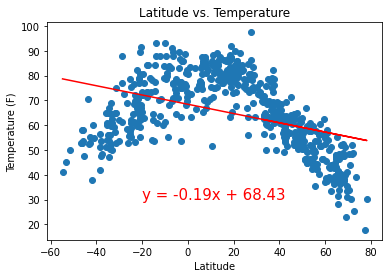

In [72]:
city_api_df["Temperature (F)"] = city_api_df["Temperature (F)"].fillna(0)
x_values = city_api_df["Latitude"]
y_values = city_api_df["Temperature (F)"]
title = "Latitude vs. Temperature"
x_label = "Latitude"
y_label = "Temperature (F)"
text_coordinates = (-20,30)
plot_linear_regression(x_values, y_values, title, x_label, y_label, text_coordinates)

## Latitude vs. Humidity Plot

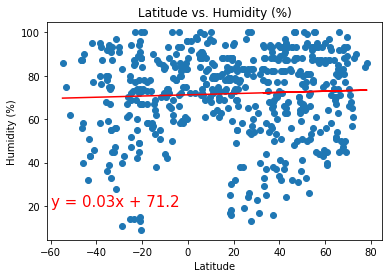

In [73]:
city_api_df["Humidity (%)"] = city_api_df["Humidity (%)"].fillna(0)
x_values = city_api_df["Latitude"]
y_values = city_api_df["Humidity (%)"]
title = "Latitude vs. Humidity (%)"
x_label = "Latitude"
y_label = "Humidity (%)"
text_coordinates = (-60,20)
plot_linear_regression(x_values, y_values, title, x_label, y_label, text_coordinates)

## Latitude vs. Cloudiness Plot

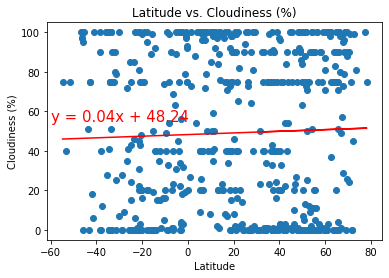

In [74]:
city_api_df["Cloudiness (%)"] = city_api_df["Cloudiness (%)"].fillna(0)
x_values = city_api_df["Latitude"]
y_values = city_api_df["Cloudiness (%)"]
title = "Latitude vs. Cloudiness (%)"
x_label = "Latitude"
y_label = "Cloudiness (%)"
text_coordinates = (-60,55)
plot_linear_regression(x_values, y_values, title, x_label, y_label, text_coordinates)

## Latitude vs. Wind Speed Plot

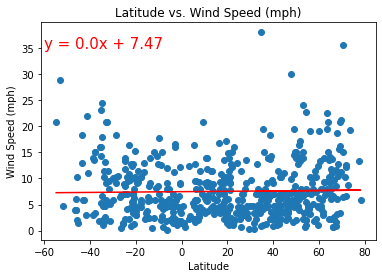

In [75]:
city_api_df["Wind Speed (mph)"] = city_api_df["Wind Speed (mph)"].fillna(0)
x_values = city_api_df["Latitude"]
y_values = city_api_df["Wind Speed (mph)"]
title = "Latitude vs. Wind Speed (mph)"
x_label = "Latitude"
y_label = "Wind Speed (mph)"
text_coordinates = (-60,35)
plot_linear_regression(x_values, y_values, title, x_label, y_label, text_coordinates)

## Linear Regression

In [ ]:
# Already complete

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

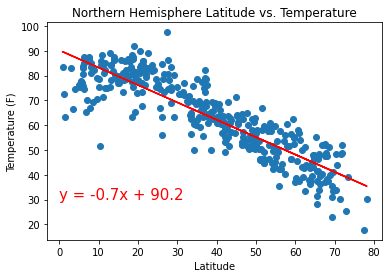

In [79]:
north_hemi = city_api_df[city_api_df["Latitude"] > 0]
x_values = north_hemi["Latitude"]
y_values = north_hemi["Temperature (F)"]
title = "Northern Hemisphere Latitude vs. Temperature"
x_label = "Latitude"
y_label = "Temperature (F)" 
text_coordinates = (0,30)
plot_linear_regression(x_values, y_values, title, x_label, y_label, text_coordinates)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

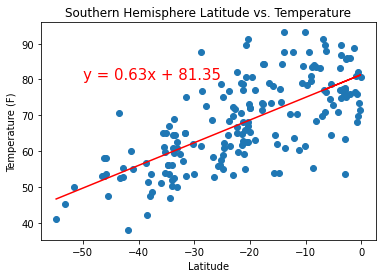

In [80]:
south_hemi = city_api_df[city_api_df["Latitude"] < 0]
x_values = south_hemi["Latitude"]
y_values = south_hemi["Temperature (F)"]
title = "Southern Hemisphere Latitude vs. Temperature"
x_label = "Latitude"
y_label = "Temperature (F)" 
text_coordinates = (-50,80)
plot_linear_regression(x_values, y_values, title, x_label, y_label, text_coordinates)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

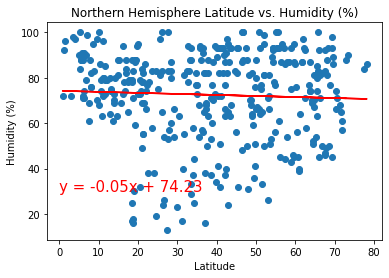

In [81]:
north_hemi = city_api_df[city_api_df["Latitude"] > 0]
x_values = north_hemi["Latitude"]
y_values = north_hemi["Humidity (%)"]
title = "Northern Hemisphere Latitude vs. Humidity (%)"
x_label = "Latitude"
y_label = "Humidity (%)" 
text_coordinates = (0,30)
plot_linear_regression(x_values, y_values, title, x_label, y_label, text_coordinates)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

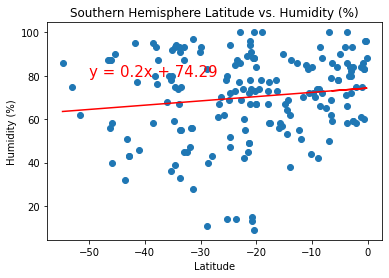

In [82]:
south_hemi = city_api_df[city_api_df["Latitude"] < 0]
x_values = south_hemi["Latitude"]
y_values = south_hemi["Humidity (%)"]
title = "Southern Hemisphere Latitude vs. Humidity (%)"
x_label = "Latitude"
y_label = "Humidity (%)" 
text_coordinates = (-50,80)
plot_linear_regression(x_values, y_values, title, x_label, y_label, text_coordinates)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

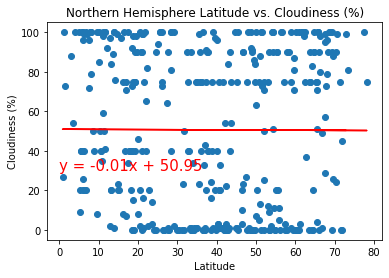

In [83]:
north_hemi = city_api_df[city_api_df["Latitude"] > 0]
x_values = north_hemi["Latitude"]
y_values = north_hemi["Cloudiness (%)"]
title = "Northern Hemisphere Latitude vs. Cloudiness (%)"
x_label = "Latitude"
y_label = "Cloudiness (%)" 
text_coordinates = (0,30)
plot_linear_regression(x_values, y_values, title, x_label, y_label, text_coordinates)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

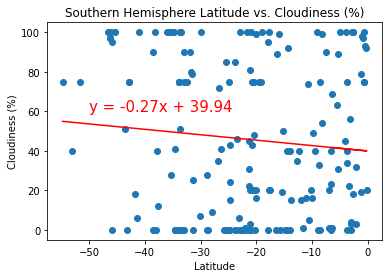

In [84]:
south_hemi = city_api_df[city_api_df["Latitude"] < 0]
x_values = south_hemi["Latitude"]
y_values = south_hemi["Cloudiness (%)"]
title = "Southern Hemisphere Latitude vs. Cloudiness (%)"
x_label = "Latitude"
y_label = "Cloudiness (%)" 
text_coordinates = (-50,60)
plot_linear_regression(x_values, y_values, title, x_label, y_label, text_coordinates)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

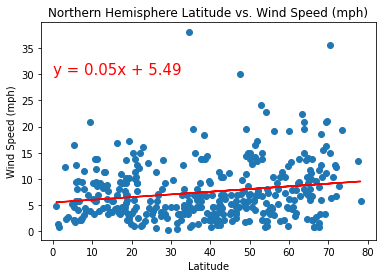

In [85]:
north_hemi = city_api_df[city_api_df["Latitude"] > 0]
x_values = north_hemi["Latitude"]
y_values = north_hemi["Wind Speed (mph)"]
title = "Northern Hemisphere Latitude vs. Wind Speed (mph)"
x_label = "Latitude"
y_label = "Wind Speed (mph)" 
text_coordinates = (0,30)
plot_linear_regression(x_values, y_values, title, x_label, y_label, text_coordinates)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

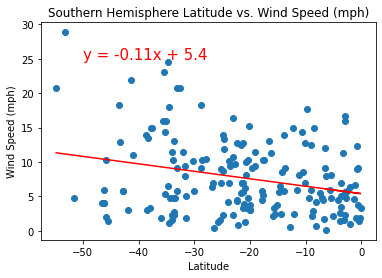

In [86]:
south_hemi = city_api_df[city_api_df["Latitude"] < 0]
x_values = south_hemi["Latitude"]
y_values = south_hemi["Wind Speed (mph)"]
title = "Southern Hemisphere Latitude vs. Wind Speed (mph)"
x_label = "Latitude"
y_label = "Wind Speed (mph)" 
text_coordinates = (-50,25)
plot_linear_regression(x_values, y_values, title, x_label, y_label, text_coordinates)